In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# 1. Carga el dataset
df = pd.read_csv("customer_churn.csv")
print(df.head())
print(df.info())

   ClienteID  Edad  Antiguedad_Meses  Ingresos_Mensuales  \
0          1    56                53                5675   
1          2    69                66                2933   
2          3    46                77                2380   
3          4    32               107                2290   
4          5    60                43                2640   

   Uso_Mensual_Datos_GB  Facturas_Atrasadas  Soporte_Llamadas  Plan_Premium  \
0                 22.84                   1                 0             0   
1                 49.26                   0                 3             0   
2                 38.71                   1                 3             0   
3                  1.84                   4                 0             0   
4                  3.73                   2                 8             0   

   Churn  
0      0  
1      0  
2      0  
3      1  
4      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 col

In [3]:
# 2. Verificar valores nulos y eliminarlos si es necesario
df.dropna(inplace=True)

In [4]:
# 3. Ingeniería de características
# Transformaciones: Creación de una nueva columna "Relacion_Ingresos_Antiguedad"
df["Relacion_Ingresos_Antiguedad"] = df["Ingresos_Mensuales"] / (df["Antiguedad_Meses"] + 1)

In [5]:
# 4. Análisis exploratorio
df.describe()

,ClienteID,Edad,Antiguedad_Meses,Ingresos_Mensuales,Uso_Mensual_Datos_GB,Facturas_Atrasadas,Soporte_Llamadas,Plan_Premium,Churn,Relacion_Ingresos_Antiguedad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,46.247000,59.682000,5445.819000,25.364710,2.024000,4.559000,0.531000,0.196000,209.538442
std,288.819436,16.288072,35.134133,2639.729202,14.330401,1.421071,2.808987,0.499288,0.397167,410.054064
min,1.000000,18.000000,1.000000,1001.000000,0.500000,0.000000,0.000000,0.000000,0.000000,8.956140
25%,250.750000,33.000000,29.000000,3096.750000,14.035000,1.000000,2.000000,0.000000,0.000000,51.294560
50%,500.500000,46.000000,59.000000,5537.000000,25.280000,2.000000,5.000000,1.000000,0.000000,90.785714
75%,750.250000,60.250000,91.000000,7674.250000,37.825000,3.000000,7.000000,1.000000,0.000000,180.085128
max,1000.000000,74.000000,119.000000,9987.000000,49.890000,4.000000,9.000000,1.000000,1.000000,4818.000000


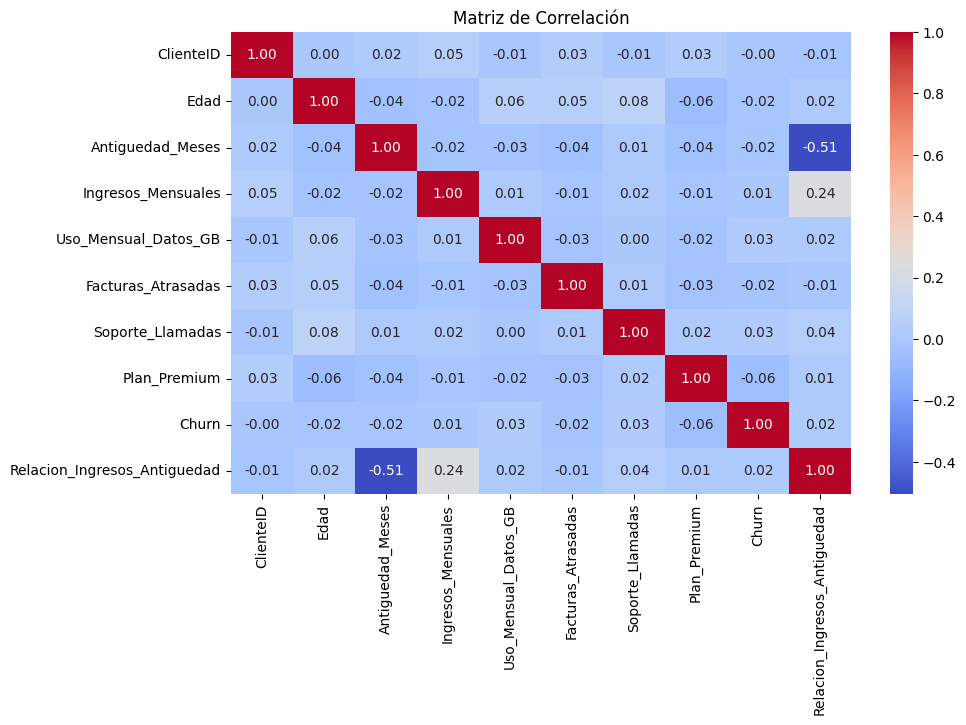

In [6]:
# 5. Visualización de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [7]:
# 6. Preparación de datos para Machine Learning
X = df.drop(columns=["ClienteID", "Churn"])
y = df["Churn"]
# Identificar variables numéricas y categóricas
num_features = ["Edad", "Antiguedad_Meses", "Ingresos_Mensuales", "Uso_Mensual_Datos_GB", "Facturas_Atrasadas", "Soporte_Llamadas", "Relacion_Ingresos_Antiguedad"]
cat_features = ["Plan_Premium"]
# Preprocesamiento: Escalar variables numéricas y codificar categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])

In [8]:
# 7. Entrenamiento y evaluación de modelos
modelos = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Regresión Logística": LogisticRegression()
}

for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ("preprocesador", preprocessor),
        ("modelo", modelo)
    ])

In [9]:
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Entrenar modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Edad', 'Antiguedad_Meses',
                                                   'Ingresos_Mensuales',
                                                   'Uso_Mensual_Datos_GB',
                                                   'Facturas_Atrasadas',
                                                   'Soporte_Llamadas',
                                                   'Relacion_Ingresos_Antiguedad']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Plan_Premium'])])),
                ('modelo', LogisticRegression())])

In [11]:
# Predicciones
y_pred = pipeline.predict(X_test)

In [12]:
# Evaluación del modelo
print(f"\nModelo: {nombre}")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")


Modelo: Regresión Logística
Matriz de Confusión:
 [[165   0]
 [ 35   0]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.68      0.82      0.75       200

Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m